## 5.1 주요 R 패키지 이용

## 1. "mtcars" data
+ 모수적 방법의 경우, 정규성과 등분산성(필요시)에 대한 검토가 필요함

In [1]:
data(mtcars)
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [2]:
mtcars$cyl = as.factor(mtcars$cyl)
av = aov(mpg ~ cyl, data = mtcars)
shapiro.test(residuals(av))


	Shapiro-Wilk normality test

data:  residuals(av)
W = 0.97065, p-value = 0.5177


+ shapiro.test : 잔차의 정규성 검정
+ 위의 경우 av의 잔차 검정에 대한 p-value > 0.05 $\rightarrow$ H0 기각 못함 $\rightarrow$ "잔차는 정규분포를 따른다"고 할 수 있음 $\rightarrow$ 정규성 만족

In [3]:
bartlett.test(mpg ~ cyl, data = mtcars)


	Bartlett test of homogeneity of variances

data:  mpg by cyl
Bartlett's K-squared = 8.3934, df = 2, p-value = 0.01505


+ bartlett.test : 등분산성 검정
+ 위의 경우 검정에 대한 p-value < 0.05 $\rightarrow$ H0 기각 $\rightarrow$ "자료는 등분산성을 만족한다"고 할 수 없음 $\rightarrow$ 등분산성 위배

### 예제 5.1 다중비교: 일원배치 분산분석

In [4]:
data(mtcars)
av = aov(mpg ~ as.factor(cyl), data = mtcars)
summary(av)

               Df Sum Sq Mean Sq F value   Pr(>F)    
as.factor(cyl)  2  824.8   412.4    39.7 4.98e-09 ***
Residuals      29  301.3    10.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

+ cyl에 대한 p-value < 0.05 $\rightarrow$ H0 기각 $\rightarrow$ cyl 유의한 인자 $\rightarrow$ 실린더에 따라 연비가 모두 동일하다고 할 수 없다.

In [5]:
mc = TukeyHSD(av)
mc

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = mpg ~ as.factor(cyl), data = mtcars)

$`as.factor(cyl)`
          diff        lwr        upr     p adj
6-4  -6.920779 -10.769350 -3.0722086 0.0003424
8-4 -11.563636 -14.770779 -8.3564942 0.0000000
8-6  -4.642857  -8.327583 -0.9581313 0.0112287


+ 모든 경우에 대하여 신뢰구간이 0을 포함하지 않음 $\rightarrow$ 실험별 오류율 5%에 대하여 유의한 평균 차이가 있음
+ 조정된 p-value인 p adj < 0.05 $\rightarrow$ 실험별 오류율 5%에 대하여 유의한 평균 차이가 있음


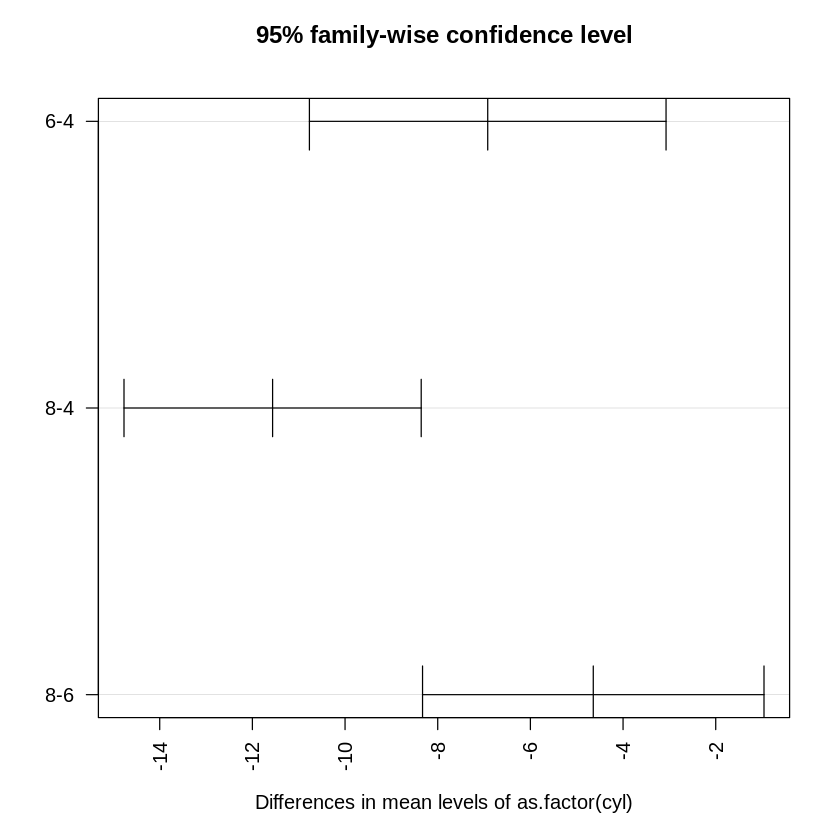

In [6]:
plot(mc, las = "2")  # las = 2 : x축 label 90도 회전

### 예제 5.3: Tukey의 모든 쌍별 다중비교(MCA)

In [7]:
data(mtcars)
mtcars$cyl = as.factor(mtcars$cyl)
av = aov(mpg ~ cyl, data = mtcars)

In [8]:
install.packages("multcomp")
library(multcomp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




In [9]:
?glht()

+ linfct : 검정할 선형 가설, rhs : 가설의 오른쪽을 지정하는 선택적 숫자 벡터

In [10]:
av.mc = glht(av, linfct = mcp(cyl = "Tukey"))
summary(av.mc)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = mpg ~ cyl, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
6 - 4 == 0   -6.921      1.558  -4.441   <0.001 ***
8 - 4 == 0  -11.564      1.299  -8.905   <0.001 ***
8 - 6 == 0   -4.643      1.492  -3.112   0.0112 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


+ 모든 경우에 대하여 p-value < 0.05 --> 실험별 오류율 5%에 대하여 유의한 평균 차이가 있음


In [11]:
summary(av.mc, test = Ftest())  # 전역 F test


	 General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Linear Hypotheses:
           Estimate
6 - 4 == 0   -6.921
8 - 4 == 0  -11.564
8 - 6 == 0   -4.643

Global Test:
     F DF1 DF2    Pr(>F)
1 39.7   2  29 4.979e-09

In [12]:
summary(av.mc, test = univariate())  # 단변량-t test


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = mpg ~ cyl, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
6 - 4 == 0   -6.921      1.558  -4.441 0.000119 ***
8 - 4 == 0  -11.564      1.299  -8.905 8.57e-10 ***
8 - 6 == 0   -4.643      1.492  -3.112 0.004152 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Univariate p values reported)


In [13]:
summary(av.mc, test = adjusted(type = "bonferroni"))  # bonferroni 조정


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = mpg ~ cyl, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
6 - 4 == 0   -6.921      1.558  -4.441 0.000358 ***
8 - 4 == 0  -11.564      1.299  -8.905 2.57e-09 ***
8 - 6 == 0   -4.643      1.492  -3.112 0.012457 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- bonferroni method)


In [14]:
summary(av.mc, test = adjusted(type = "single-step"))  # single-step 조정


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = mpg ~ cyl, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
6 - 4 == 0   -6.921      1.558  -4.441   <0.001 ***
8 - 4 == 0  -11.564      1.299  -8.905   <0.001 ***
8 - 6 == 0   -4.643      1.492  -3.112   0.0112 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


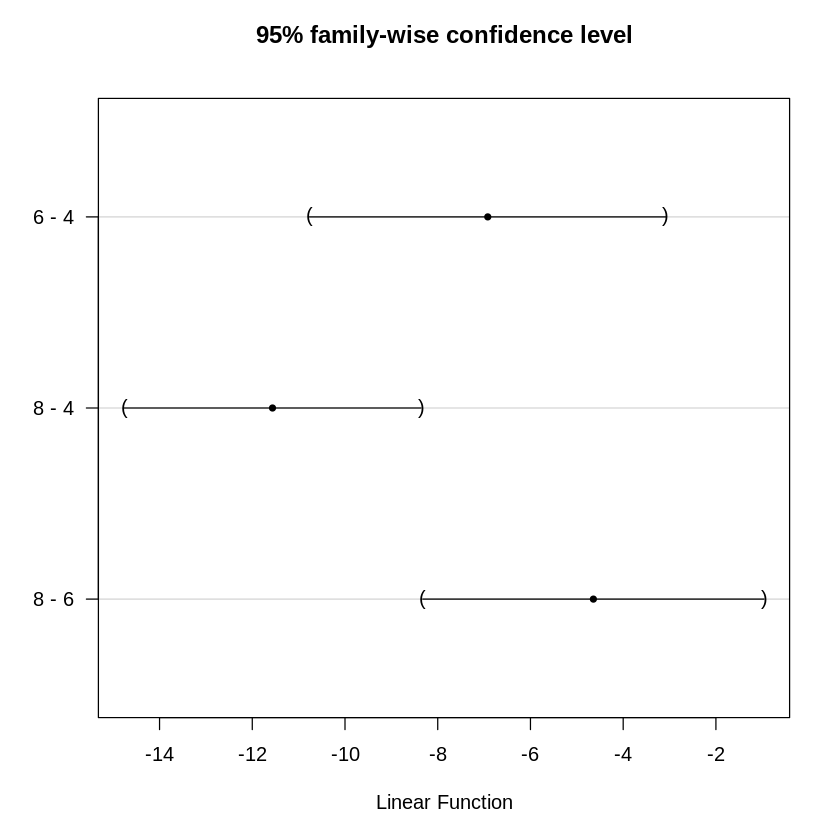

In [15]:
av.ci = confint(av.mc, level = 0.95)  # 동시신뢰구간
plot(av.ci)

+ 모든 경우에 대하여 신뢰구간이 0을 포함하지 않음 $\rightarrow$ 실험별 오류율 5%에 대하여 유의한 평균 차이가 있음


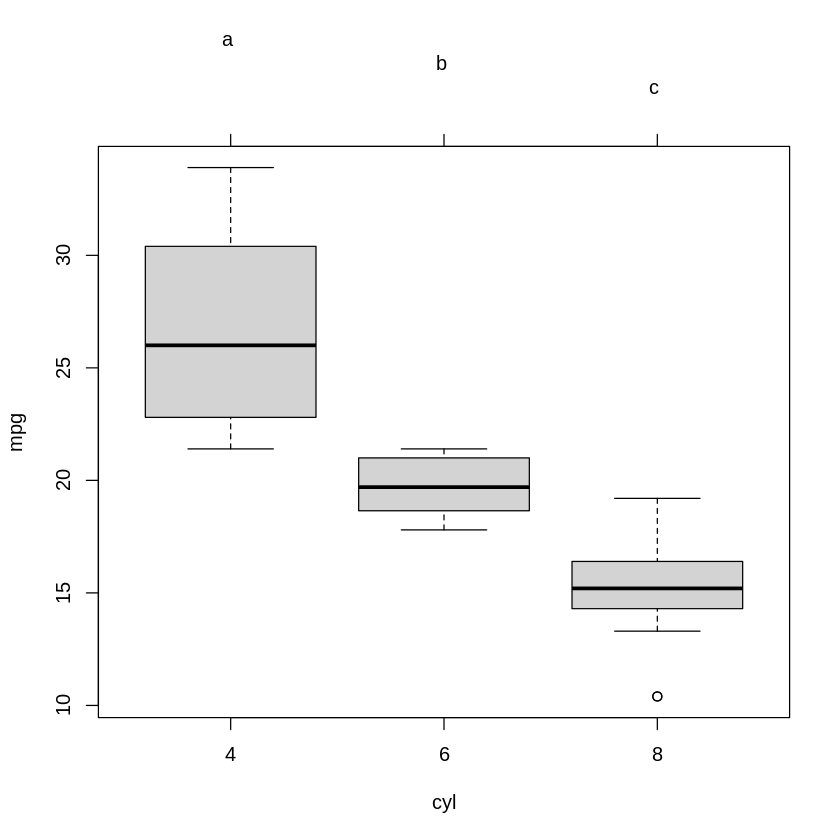

In [16]:
par(mar = c(5.1, 4.1, 6.1, 2.1))
?cld()
plot(cld(av.mc))

+ 같은 그룹으로 묶인 경우라면 plot 위의 알파벳에 동일 글자가 찍혀야하는데 이번 경우에는 세가지 cyl에 대해 모두 차이가 있다고 할 수 있음

In [17]:
dev.off()

null device 
          1

### 예제 5.4: Dunnett의 방법(MCC)

In [18]:
summary(glht(av, linfct = mcp(cyl = "Dunnett")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = mpg ~ cyl, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
6 - 4 == 0   -6.921      1.558  -4.441 0.000235 ***
8 - 4 == 0  -11.564      1.299  -8.905 1.71e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


+ 모든 경우에 대하여 p-value < 0.05 $\rightarrow$ 실험별 오류율 5%에 대하여 유의한 평균 차이가 있음

In [19]:
av.mcc = glht(av, linfct = mcp(cyl = "Dunnett"), alternative = "less")
summary(av.mcc)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = mpg ~ cyl, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value   Pr(<t)    
6 - 4 >= 0   -6.921      1.558  -4.441 0.000117 ***
8 - 4 >= 0  -11.564      1.299  -8.905 8.54e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


+ 단측 검정에서도 모든 경우에 대하여 p-value < 0.05 $\rightarrow$ 실험별 오류율 5%에 대하여 유의한 평균 차이가 있음

In [20]:
summary(av.mcc, test = adjusted(type = "bonferroni"))  # bonferroni 조정


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = mpg ~ cyl, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value   Pr(<t)    
6 - 4 >= 0   -6.921      1.558  -4.441 0.000119 ***
8 - 4 >= 0  -11.564      1.299  -8.905 8.57e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- bonferroni method)


In [21]:
summary(av.mcc, test = adjusted(type = "free"))  # step-down 조정


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = mpg ~ cyl, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value   Pr(<t)    
6 - 4 >= 0   -6.921      1.558  -4.441 5.97e-05 ***
8 - 4 >= 0  -11.564      1.299  -8.905 8.54e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- free method)


In [22]:
summary(av.mcc, test = adjusted(type = "holm"))  # holm 조정


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = mpg ~ cyl, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value   Pr(<t)    
6 - 4 >= 0   -6.921      1.558  -4.441 5.97e-05 ***
8 - 4 >= 0  -11.564      1.299  -8.905 8.57e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- holm method)


## 2. "warpbreaks" data

### 예제 5.2 다중비교: 이원배치 분산분석

In [23]:
data("warpbreaks")
str(warpbreaks)

'data.frame':	54 obs. of  3 variables:
 $ breaks : num  26 30 54 25 70 52 51 26 67 18 ...
 $ wool   : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ tension: Factor w/ 3 levels "L","M","H": 1 1 1 1 1 1 1 1 1 2 ...


In [24]:
fm1 = aov(breaks ~ wool + tension, data = warpbreaks)
summary(fm1)

            Df Sum Sq Mean Sq F value  Pr(>F)   
wool         1    451   450.7   3.339 0.07361 . 
tension      2   2034  1017.1   7.537 0.00138 **
Residuals   50   6748   135.0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

+ tension에 대한 p-value < 0.05 $\rightarrow$ H0 기각 $\rightarrow$ tension 유의한 인자 - 강도에 따라 베틀에 꼬인 횟수가 모두 동일하다고 할 수 없다.


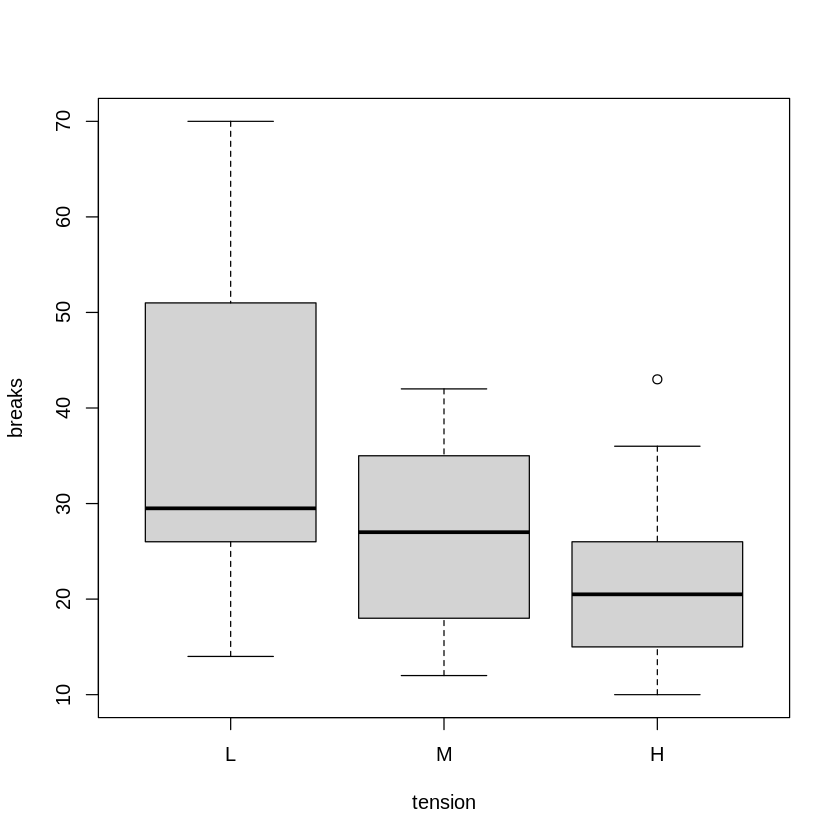

In [25]:
boxplot(breaks ~ tension, data = warpbreaks)

In [26]:
TukeyHSD(fm1, "tension", ordered = TRUE)  # which : 구간을 계산할 벡터, ordered = TRUE : 평균의 계산된 차이가 모두 양수가 됨


  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = breaks ~ wool + tension, data = warpbreaks)

$tension
         diff        lwr      upr     p adj
M-H  4.722222 -4.6311985 14.07564 0.4474210
L-H 14.722222  5.3688015 24.07564 0.0011218
L-M 10.000000  0.6465793 19.35342 0.0336262


+ L-H, L-M에 대하여 신뢰구간이 0을 포함하지 않음 $\rightarrow$ 실험별 오류율 5%에 대하여 유의한 평균 차이가 있음
+ M-H에 대하여 신뢰구간이 0을 포함함 $\rightarrow$ 실험별 오류율 5%에 대하여 유의한 평균 차이가 없음

$\rightarrow$ 따라서 L과 M, H로 구분할 수 있음


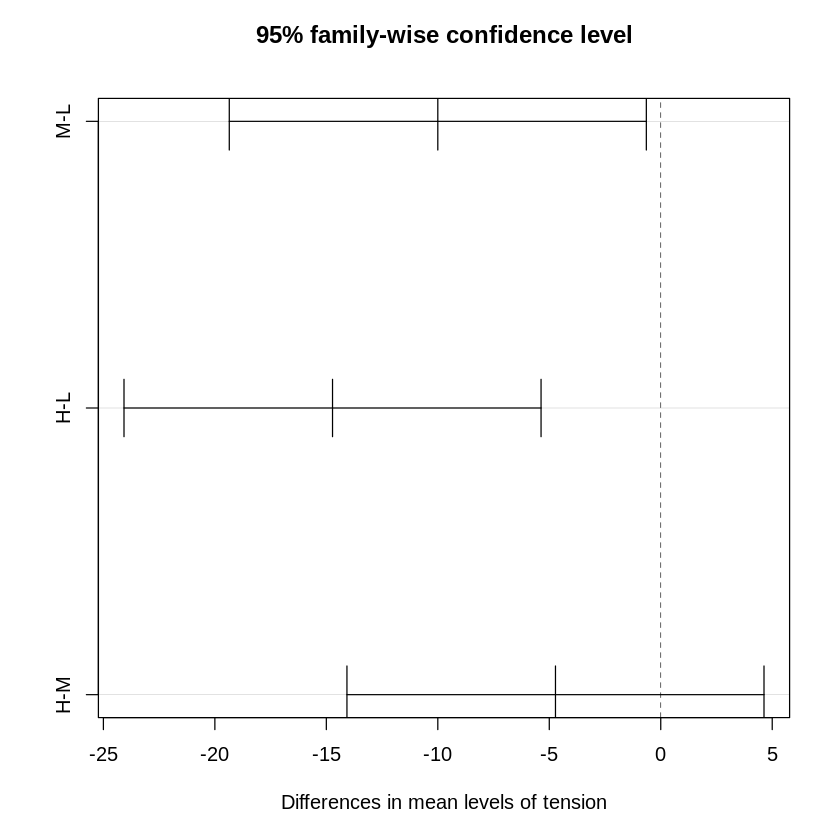

In [27]:
plot(TukeyHSD(fm1, "tension"))

### 예제 5.5: 이원배치에서의 Tukey 방법

In [28]:
install.packages("multcomp")
library(multcomp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
wb.aov = aov(breaks ~ wool + tension, data = warpbreaks)
wb.mc = glht(wb.aov, linfct = mcp(tension = "Tukey"))
summary(wb.mc)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = breaks ~ wool + tension, data = warpbreaks)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)   
M - L == 0  -10.000      3.872  -2.582  0.03352 * 
H - L == 0  -14.722      3.872  -3.802  0.00111 **
H - M == 0   -4.722      3.872  -1.219  0.44742   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


+ L-H, L-M에 대하여 p-value < 0.05 $\rightarrow$ 실험별 오류율 5%에 대하여 유의한 평균 차이가 있음
+ M-H에 대하여 p-value > 0.05 $\rightarrow$ 실험별 오류율 5%에 대하여 유의한 평균 차이가 없음

$\rightarrow$ 따라서 L과 M, H로 구분할 수 있음

#### (a) 대비 지정 방법

In [30]:
summary(glht(wb.aov, linfct = mcp(tension = c("M - L = 0", "H - L = 0", "H - M = 0"))))  # 차이를 기호로 지정


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = breaks ~ wool + tension, data = warpbreaks)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)   
M - L == 0  -10.000      3.872  -2.582  0.03364 * 
H - L == 0  -14.722      3.872  -3.802  0.00107 **
H - M == 0   -4.722      3.872  -1.219  0.44740   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [31]:
contr = rbind("M - L" = c(-1, 1, 0), "H - L" = c(-1, 0, 1), "H - M" = c(0, -1, 1))  # 대비행렬 정의
contr

M - L,-1,1,0
H - L,-1,0,1
H - M,0,-1,1


In [32]:
summary(glht(wb.aov, linfct = mcp(tension = contr)))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = breaks ~ wool + tension, data = warpbreaks)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)   
M - L == 0  -10.000      3.872  -2.582   0.0337 * 
H - L == 0  -14.722      3.872  -3.802   0.0011 **
H - M == 0   -4.722      3.872  -1.219   0.4474   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [33]:
# glht(wb.aov, linfct = cbind(0, contr %*% contr.treatment(3))) : ERROR
contr.treatment(3)
contr %*% contr.treatment(3)
cbind(0, contr %*% contr.treatment(3))

,2,3
1,0,0
2,1,0
3,0,1


,2,3
M - L,1,0
H - L,0,1
H - M,-1,1


,,2,3
M - L,0,1,0
H - L,0,0,1
H - M,0,-1,1


#### (b) 혼합형 가설의 다중비교

In [34]:
# vcov(warpbreaks.mc)  # 분산-공분산 행렬
# cov2cor(vcov(warpbreaks.mc))  # 공분산행렬 --> 상관행렬
# summary(warpbreaks.mc)
# ERROR 해결 필요

### 예제 5.6* : 다중선형회귀에서의 다중비교

In [35]:
lmod = lm(Fertility ~ ., data = swiss)
summary(lmod)


Call:
lm(formula = Fertility ~ ., data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2743  -5.2617   0.5032   4.1198  15.3213 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      66.91518   10.70604   6.250 1.91e-07 ***
Agriculture      -0.17211    0.07030  -2.448  0.01873 *  
Examination      -0.25801    0.25388  -1.016  0.31546    
Education        -0.87094    0.18303  -4.758 2.43e-05 ***
Catholic          0.10412    0.03526   2.953  0.00519 ** 
Infant.Mortality  1.07705    0.38172   2.822  0.00734 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.165 on 41 degrees of freedom
Multiple R-squared:  0.7067,	Adjusted R-squared:  0.671 
F-statistic: 19.76 on 5 and 41 DF,  p-value: 5.594e-10


+ Agriculture, Education, Catholic, Infant.Mortality에 대해서는 p-value < 0.05 $\rightarrow$ H0 기각 $\rightarrow$ 회귀계수가 0이라고 할 수 없다.


In [36]:
k = diag(length(coef(lmod)))[-1, ]  # 대각행렬 생성
rownames(k) = names(coef(lmod))[-1]
k

Agriculture,0,1,0,0,0,0
Examination,0,0,1,0,0,0
Education,0,0,0,1,0,0
Catholic,0,0,0,0,1,0
Infant.Mortality,0,0,0,0,0,1


In [37]:
summary(glht(lmod, linfct = k))  # 행렬로 지정


	 Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = Fertility ~ ., data = swiss)

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)    
Agriculture == 0      -0.17211    0.07030  -2.448   0.0792 .  
Examination == 0      -0.25801    0.25388  -1.016   0.7848    
Education == 0        -0.87094    0.18303  -4.758   <0.001 ***
Catholic == 0          0.10412    0.03526   2.953   0.0230 *  
Infant.Mortality == 0  1.07705    0.38172   2.822   0.0328 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


+ Education, Catholic, Infant.Mortality에 대해서는 p-value < 0.05 $\rightarrow$ H0 기각 $\rightarrow$ 회귀계수가 0이라고 할 수 없다.
+ 다중검정으로는 Agriculture가 기각되지 않았기에 다중검정이 더 엄격한 방법(귀무가설을 기각시키기 어려움)이라고 할 수 있다.


In [38]:
glht(lmod, linfct = c("Agriculture = 0", "Examination = 0", "Education = 0", "Catholic = 0", "Infant.Mortality = 0"))  # 직접 지정


	 General Linear Hypotheses

Linear Hypotheses:
                      Estimate
Agriculture == 0       -0.1721
Examination == 0       -0.2580
Education == 0         -0.8709
Catholic == 0           0.1041
Infant.Mortality == 0   1.0770


In [39]:
summary(glht(lmod, linfct = k), test = adjusted(type = "bonferroni"))  # bonferroni 조정


	 Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = Fertility ~ ., data = swiss)

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)    
Agriculture == 0      -0.17211    0.07030  -2.448 0.093636 .  
Examination == 0      -0.25801    0.25388  -1.016 1.000000    
Education == 0        -0.87094    0.18303  -4.758 0.000122 ***
Catholic == 0          0.10412    0.03526   2.953 0.025950 *  
Infant.Mortality == 0  1.07705    0.38172   2.822 0.036679 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- bonferroni method)


+ 위의 디폴트 다중검정과 동일함. 또한, 조정된 p값은 다중선형회귀의 p값의 5배

## 5.2장 {agricolae} 패키지 이용
### 예제 5.7: Fisher의 LSD 검정

In [40]:
install.packages("agricolae")
library(agricolae)
data("sweetpotato")
str(sweetpotato)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘proxy’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘e1071’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’, ‘klaR’, ‘AlgDesign’




'data.frame':	12 obs. of  2 variables:
 $ virus: Factor w/ 4 levels "cc","fc","ff",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ yield: num  28.5 21.7 23 14.9 10.6 13.1 41.8 39.2 28 38.2 ...


In [41]:
model = aov(yield ~ virus, data = sweetpotato)
summary(model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
virus        3 1170.2   390.1   17.34 0.000733 ***
Residuals    8  179.9    22.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

+ virus에 대한 p-value < 0.05 --> H0 기각 $\rightarrow$ virus 유의한 인자 - virus에 따라 yield가 모두 동일하다고 할 수 없다.

In [42]:
out_none = LSD.test(model, "virus", p.adj = "none")  # 실험별 오류율이 미조정(none)
out_none

$statistics
   MSerror Df   Mean      CV  t.value      LSD
  22.48917  8 27.625 17.1666 2.306004 8.928965

$parameters
        test p.ajusted name.t ntr alpha
  Fisher-LSD      none  virus   4  0.05

$means
      yield      std r       se       LCL      UCL  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 18.086268 30.71373 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953  6.552935 19.18040 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 30.019601 42.64707 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 30.586268 43.21373 32.1 40.4 35.15 38.2 39.30

$comparison
NULL

$groups
      yield groups
oo 36.90000      a
ff 36.33333      a
cc 24.40000      b
fc 12.86667      c

attr(,"class")
[1] "group"

+ oo, ff/cc/fc 이렇게 3개의 그룹으로 나뉨
+ LSD 임계값 : 8.928965

In [43]:
out_bon = LSD.test(model, "virus", p.adj = "bonferroni")  # 실험별 오류율이 조정(bonferroni)
out_bon

$statistics
   MSerror Df   Mean      CV  t.value     MSD
  22.48917  8 27.625 17.1666 3.478879 13.4704

$parameters
        test  p.ajusted name.t ntr alpha
  Fisher-LSD bonferroni  virus   4  0.05

$means
      yield      std r       se       LCL      UCL  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 18.086268 30.71373 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953  6.552935 19.18040 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 30.019601 42.64707 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 30.586268 43.21373 32.1 40.4 35.15 38.2 39.30

$comparison
NULL

$groups
      yield groups
oo 36.90000      a
ff 36.33333      a
cc 24.40000     ab
fc 12.86667      b

attr(,"class")
[1] "group"

+ oo,ff,cc/cc,fc 이렇게 2개의 그룹으로 나뉨
+ MSD 임계값 : 13.4704

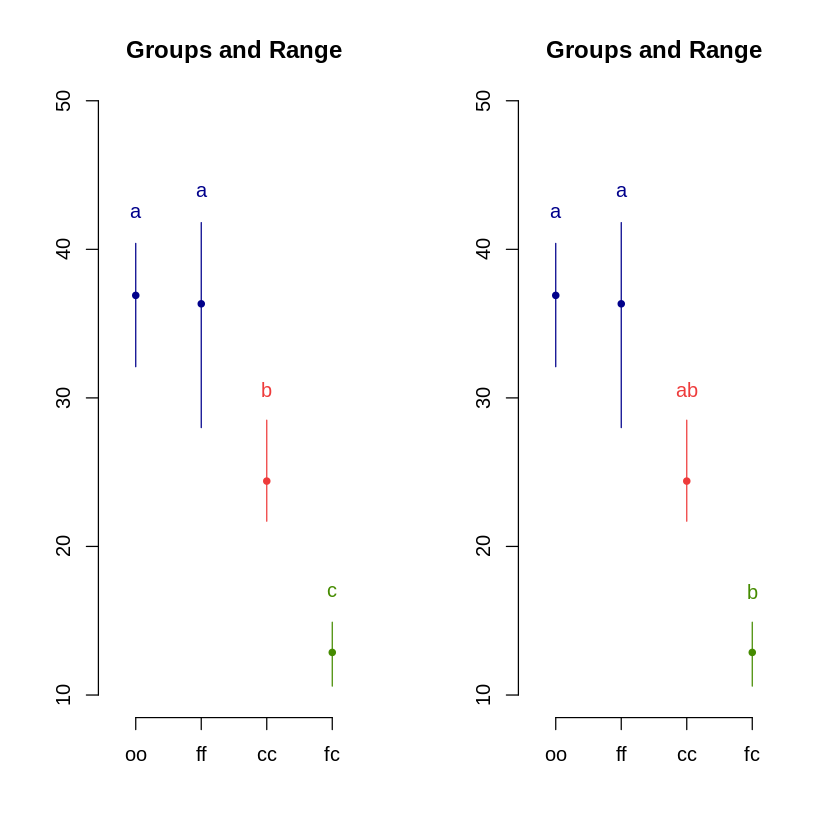

In [44]:
par(mfrow = c(1, 2))
plot(out_none)
plot(out_bon)

+ 실험별 오류율 조정에 따라 자료의 그룹핑이 다른 결과를 가져옴

In [45]:
LSD.test(model, "virus", group = FALSE, p.adj = "none", console = TRUE)


Study: model ~ "virus"

LSD t Test for yield 

Mean Square Error:  22.48917 

virus,  means and individual ( 95 %) CI

      yield      std r       se       LCL      UCL  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 18.086268 30.71373 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953  6.552935 19.18040 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 30.019601 42.64707 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 30.586268 43.21373 32.1 40.4 35.15 38.2 39.30

Alpha: 0.05 ; DF Error: 8
Critical Value of t: 2.306004 

Comparison between treatments means

         difference pvalue signif.        LCL        UCL
cc - fc  11.5333333 0.0176       *   2.604368  20.462299
cc - ff -11.9333333 0.0151       * -20.862299  -3.004368
cc - oo -12.5000000 0.0121       * -21.428965  -3.571035
fc - ff -23.4666667 0.0003     *** -32.395632 -14.537701
fc - oo -24.0333333 0.0003     *** -32.962299 -15.104368
ff - oo  -0.5666667 0.8873          -9.495632   8.36

+ group = FALSE : 쌍별 차이에 대한 통계량을 모두 서술함
+ group = TRUE : 쌍별 차이에 대한 통계량은 서술하지 않으며 어떻게 자료가 그룹핑 되는지를 서술함

In [46]:
LSD.test(model, "virus", group = FALSE, p.adj = "bonferroni", console = TRUE)


Study: model ~ "virus"

LSD t Test for yield 
P value adjustment method: bonferroni 

Mean Square Error:  22.48917 

virus,  means and individual ( 95 %) CI

      yield      std r       se       LCL      UCL  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 18.086268 30.71373 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953  6.552935 19.18040 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 30.019601 42.64707 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 30.586268 43.21373 32.1 40.4 35.15 38.2 39.30

Alpha: 0.05 ; DF Error: 8
Critical Value of t: 3.478879 

Comparison between treatments means

         difference pvalue signif.        LCL         UCL
cc - fc  11.5333333 0.1058          -1.937064  25.0037305
cc - ff -11.9333333 0.0904       . -25.403730   1.5370638
cc - oo -12.5000000 0.0725       . -25.970397   0.9703971
fc - ff -23.4666667 0.0018      ** -36.937064  -9.9962695
fc - oo -24.0333333 0.0015      ** -37.503730 -10.5629362
ff - oo

+ 여기서의 쌍별 차이에 대한 p-value는 bonferroni 조정에 의한 조정된 p-value

### 예제 5.8 Tukey의 HSD방법 : 반복수가 같은 경우

In [47]:
outHSD = HSD.test(model, "virus", console = TRUE)
outHSD


Study: model ~ "virus"

HSD Test for yield 

Mean Square Error:  22.48917 

virus,  means

      yield      std r       se  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 32.1 40.4 35.15 38.2 39.30

Alpha: 0.05 ; DF Error: 8 
Critical Value of Studentized Range: 4.52881 

Minimun Significant Difference: 12.39967 

Treatments with the same letter are not significantly different.

      yield groups
oo 36.90000      a
ff 36.33333     ab
cc 24.40000     bc
fc 12.86667      c


$statistics
   MSerror Df   Mean      CV      MSD
  22.48917  8 27.625 17.1666 12.39967

$parameters
   test name.t ntr StudentizedRange alpha
  Tukey  virus   4          4.52881  0.05

$means
      yield      std r       se  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 32.1 40.4 35.15 38.2 39.30

$comparison
NULL

$groups
      yield groups
oo 36.90000      a
ff 36.33333     ab
cc 24.40000     bc
fc 12.86667      c

attr(,"class")
[1] "group"

+ oo, ff/ff, cc/cc, fc 이렇게 3개의 그룹으로 나뉨

### 예제 5.9 Tukey의 HSD방법 : 반복수가 다른 경우

In [48]:
A = sweetpotato[-c(4, 5, 7), ]
modelUnbalanced = aov(yield ~ virus, data = A)
outUn = HSD.test(modelUnbalanced, "virus", group = FALSE, unbalanced = TRUE)
print(outUn$comparison)

        difference pvalue signif.        LCL       UCL
cc - fc       11.3 0.2515          -7.961204 30.561204
cc - ff       -9.2 0.3858         -28.461204 10.061204
cc - oo      -12.5 0.1957         -31.761204  6.761204
fc - ff      -20.5 0.0397       * -39.761204 -1.238796
fc - oo      -23.8 0.0222       * -43.061204 -4.538796
ff - oo       -3.3 0.9173         -22.561204 15.961204


In [49]:
outUn = HSD.test(modelUnbalanced, "virus", group = TRUE, unbalanced = TRUE)
print(outUn$groups)

   yield groups
oo  36.9      a
ff  33.6      a
cc  24.4     ab
fc  13.1      b


+ oo, ff, cc/ cc, fc 이렇게 2개의 그룹으로 나뉨

In [50]:
outUn = HSD.test(modelUnbalanced, "virus", group = FALSE)
print(outUn$comparison[, 1:2])

        difference pvalue
cc - fc       11.3 0.3165
cc - ff       -9.2 0.2974
cc - oo      -12.5 0.0961
fc - ff      -20.5 0.0714
fc - oo      -23.8 0.0334
ff - oo       -3.3 0.8849


In [51]:
outUn = HSD.test(modelUnbalanced, "virus", group = TRUE)
print(outUn$groups)

   yield groups
oo  36.9      a
ff  33.6     ab
cc  24.4     ab
fc  13.1      b


+ oo, ff, cc/ ff, cc, fc 이렇게 2개의 그룹으로 나뉨

### 예제 5.10 : Duncan의 방법

In [52]:
library(agricolae)
data("sweetpotato")

In [53]:
model = aov(yield ~ virus, data = sweetpotato)
out.d = duncan.test(model, "virus", group = TRUE)
out.d

$statistics
   MSerror Df   Mean      CV
  22.48917  8 27.625 17.1666

$parameters
    test name.t ntr alpha
  Duncan  virus   4  0.05

$duncan
     Table CriticalRange
2 3.261182      8.928965
3 3.398460      9.304825
4 3.475191      9.514910

$means
      yield      std r       se  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 32.1 40.4 35.15 38.2 39.30

$comparison
NULL

$groups
      yield groups
oo 36.90000      a
ff 36.33333      a
cc 24.40000      b
fc 12.86667      c

attr(,"class")
[1] "group"

+ oo, ff/cc/fc 이렇게 3개의 그룹으로 나뉨

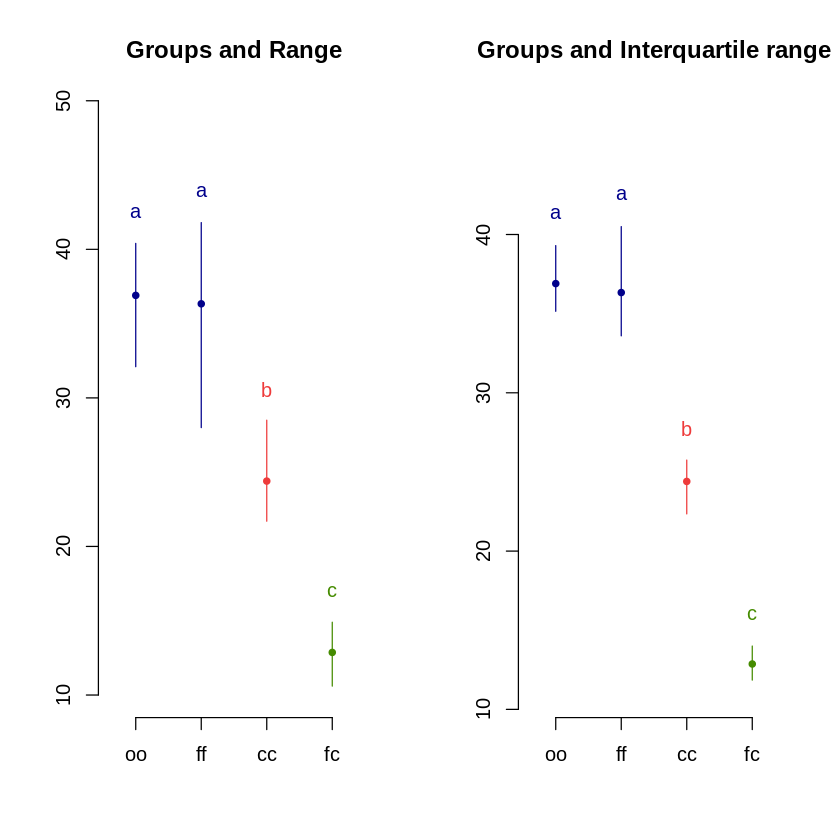

In [54]:
par(mfrow = c(1, 2))
plot(out.d)
plot(out.d, variation = "IQR")  # 4분위 범위

### 예제 5.11 : Scheffe의 방법

In [55]:
data("sweetpotato")
model = aov(yield ~ virus, data = sweetpotato)
out.s = scheffe.test(model, "virus", group = FALSE)
out.s

$statistics
   MSerror Df        F   Mean      CV  Scheffe CriticalDifference
  22.48917  8 4.066181 27.625 17.1666 3.492641           13.52368

$parameters
     test name.t ntr alpha
  Scheffe  virus   4  0.05

$means
      yield      std r       se  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 32.1 40.4 35.15 38.2 39.30

$comparison
         Difference pvalue sig       LCL        UCL
cc - fc  11.5333333 0.0978   .  -1.99035  25.057017
cc - ff -11.9333333 0.0855   . -25.45702   1.590350
cc - oo -12.5000000 0.0706   . -26.02368   1.023684
fc - ff -23.4666667 0.0023  ** -36.99035  -9.942983
fc - oo -24.0333333 0.0020  ** -37.55702 -10.509650
ff - oo  -0.5666667 0.9991     -14.09035  12.957017

$groups
NULL

attr(,"class")
[1] "group"

In [56]:
out.s = scheffe.test(model, "virus", group = TRUE)
out.s

$statistics
   MSerror Df        F   Mean      CV  Scheffe CriticalDifference
  22.48917  8 4.066181 27.625 17.1666 3.492641           13.52368

$parameters
     test name.t ntr alpha
  Scheffe  virus   4  0.05

$means
      yield      std r       se  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 32.1 40.4 35.15 38.2 39.30

$comparison
NULL

$groups
      yield groups
oo 36.90000      a
ff 36.33333      a
cc 24.40000     ab
fc 12.86667      b

attr(,"class")
[1] "group"

+ 예제에서는 group = FALSE를 했으나 TRUE로 적용을 해보니 oo,ff,cc/cc,fc 이렇게 2개의 그룹으로 나뉨

### 예제 5.12 : SNK 방법

In [57]:
SNK.test(model, "virus", group = FALSE, console = TRUE)


Study: model ~ "virus"

Student Newman Keuls Test
for yield 

Mean Square Error:  22.48917 

virus,  means

      yield      std r       se  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 32.1 40.4 35.15 38.2 39.30

Comparison between treatments means

         difference pvalue signif.        LCL        UCL
cc - fc  11.5333333 0.0176       *   2.604368  20.462299
cc - ff -11.9333333 0.0151       * -20.862299  -3.004368
cc - oo -12.5000000 0.0291       * -23.564170  -1.435830
fc - ff -23.4666667 0.0008     *** -34.530836 -12.402497
fc - oo -24.0333333 0.0012      ** -36.433003 -11.633664
ff - oo  -0.5666667 0.8873          -9.495632   8.362299


In [58]:
SNK.test(model, "virus", group = TRUE, console = TRUE)


Study: model ~ "virus"

Student Newman Keuls Test
for yield 

Mean Square Error:  22.48917 

virus,  means

      yield      std r       se  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 32.1 40.4 35.15 38.2 39.30

Alpha: 0.05 ; DF Error: 8 

Critical Range
        2         3         4 
 8.928965 11.064170 12.399670 

Means with the same letter are not significantly different.

      yield groups
oo 36.90000      a
ff 36.33333      a
cc 24.40000      b
fc 12.86667      c


+ 예제에서는 group = FALSE를 했으나 TRUE로 적용을 해보니 oo,ff/cc/fc 이렇게 3개의 그룹으로 나뉨

### 예제 5.13 : REGW 방법

In [59]:
REGW.test(model, "virus", group = FALSE, console = TRUE)


Study: model ~ "virus"

Ryan, Einot and Gabriel and Welsch multiple range test
for yield 

Mean Square Error:  22.48917 

virus,  means

      yield      std r       se  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 32.1 40.4 35.15 38.2 39.30

Comparison between treatments means

         difference pvalue signif.         LCL         UCL
cc - fc  11.5333333 0.0350       *   0.9112173  22.1554494
cc - ff -11.9333333 0.0360       * -22.9975029  -0.8691637
cc - oo -12.5000000 0.0482       * -24.8996698  -0.1003302
fc - ff -23.4666667 0.0006     *** -34.0887827 -12.8445506
fc - oo -24.0333333 0.0007     *** -35.0975029 -12.9691637
ff - oo  -0.5666667 0.9873         -11.1887827  10.0554494


In [60]:
REGW.test(model, "virus", group = TRUE, console = TRUE)


Study: model ~ "virus"

Ryan, Einot and Gabriel and Welsch multiple range test
for yield 

Mean Square Error:  22.48917 

virus,  means

      yield      std r       se  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 32.1 40.4 35.15 38.2 39.30

Alpha: 0.05 ; DF Error: 8 

Critical Range
       2        3        4 
10.62212 11.06417 12.39967 

Means with the same letter are not significantly different.

      yield groups
oo 36.90000      a
ff 36.33333      a
cc 24.40000      b
fc 12.86667      c


+ 예제에서는 group = FALSE를 했으나 TRUE로 적용을 해보니 oo,ff/cc/fc 이렇게 3개의 그룹으로 나뉨

### 예제 5.14 : Waller-Duncan의 방법

In [61]:
library(agricolae)
data("sweetpotato")

In [62]:
model = aov(yield ~ virus, data = sweetpotato)
summary(model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
virus        3 1170.2   390.1   17.34 0.000733 ***
Residuals    8  179.9    22.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

+ virus에 대한 p-value < 0.05 $\rightarrow$ H0 기각 $\rightarrow$ virus 유의한 인자 - virus에 따라 yield가 모두 동일하다고 할 수 없다.

In [63]:
out = waller.test(model, "virus", group = TRUE)
out

$statistics
    Mean Df      CV  MSerror  F.Value Waller CriticalDifference
  27.625  8 17.1666 22.48917 17.34478  2.236           8.657906

$parameters
           test name.t ntr   K
  Waller-Duncan  virus   4 100

$means
      yield      std r       se  Min  Max   Q25  Q50   Q75
cc 24.40000 3.609709 3 2.737953 21.7 28.5 22.35 23.0 25.75
fc 12.86667 2.159475 3 2.737953 10.6 14.9 11.85 13.1 14.00
ff 36.33333 7.333030 3 2.737953 28.0 41.8 33.60 39.2 40.50
oo 36.90000 4.300000 3 2.737953 32.1 40.4 35.15 38.2 39.30

$comparison
NULL

$groups
      yield groups
oo 36.90000      a
ff 36.33333      a
cc 24.40000      b
fc 12.86667      c

attr(,"class")
[1] "group"

+ oo, ff/cc/fc 이렇게 3개의 그룹으로 나뉨

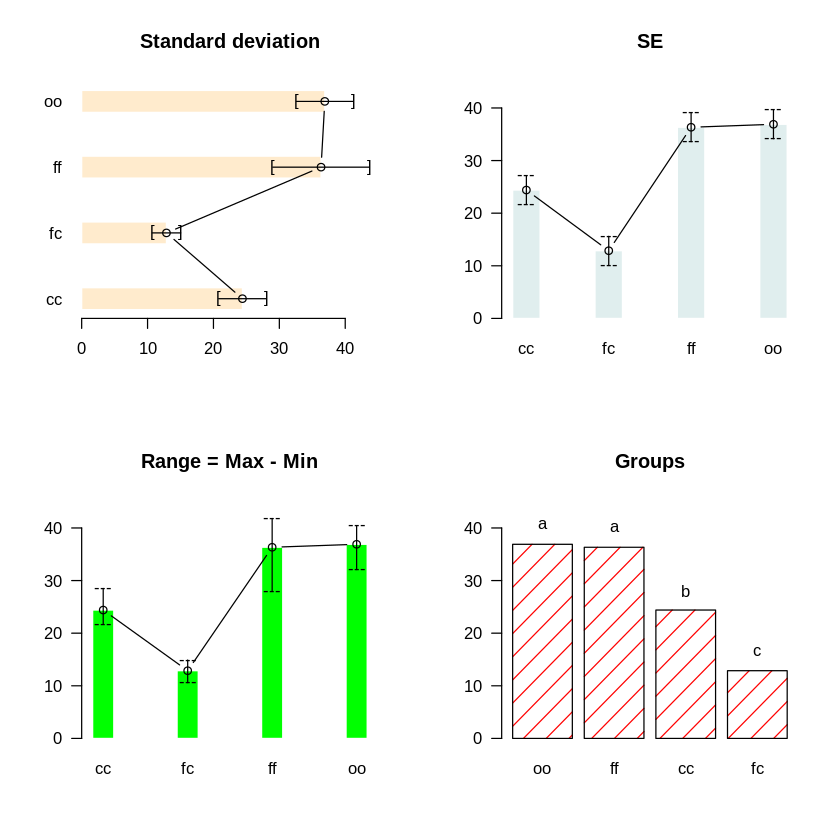

In [64]:
par(mfrow = c(2, 2))
bar.err(out$means, variation = "SD", horiz = TRUE, xlim = c(0, 45), bar = FALSE, col = colors()[25],
        space = 2, main = "Standard deviation", las = 1)
bar.err(out$means, variation = "SE", horiz = FALSE, ylim = c(0, 45), bar = FALSE, col = colors()[15],
        space = 2, main = "SE", las = 1)
bar.err(out$means, variation = "range", ylim = c(0, 45), bar = FALSE, col = "green", space = 3,
        main = "Range = Max - Min", las = 1)
bar.group(out$groups, horiz = FALSE, ylim = c(0, 45), density = 8, col = "red", main = "Groups", las = 1)

## 5.2.2 다중비교의 시각화
### (a) bar.group()

In [65]:
data("sweetpotato")
model = aov(yield ~ virus, data = sweetpotato)
comparison = LSD.test(model, "virus", alpha = 0.01, group = TRUE)
print(comparison$groups)

      yield groups
oo 36.90000      a
ff 36.33333      a
cc 24.40000     ab
fc 12.86667      b


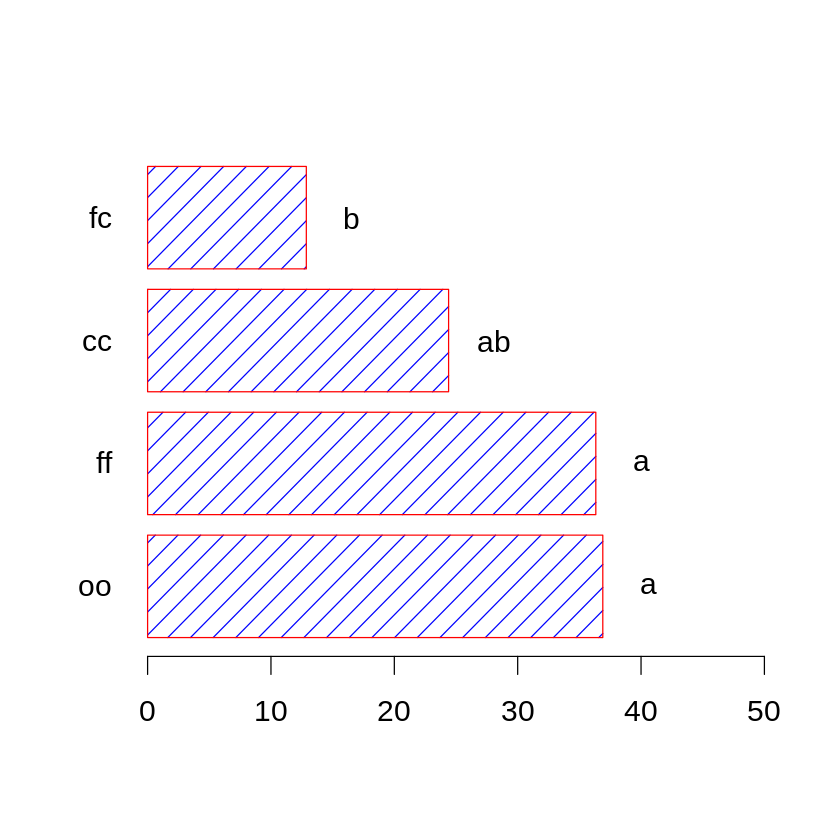

In [66]:
oldpar = par(cex = 1.5)
bar.group(comparison$groups, horiz = TRUE, density = 8, col = "blue", border = "red", xlim = c(0, 50), las = 1)

### (b) bar.err()

function (x, variation = c("SE", "SD", "range", "IQR"), horiz = FALSE, 
    bar = TRUE, ...)  


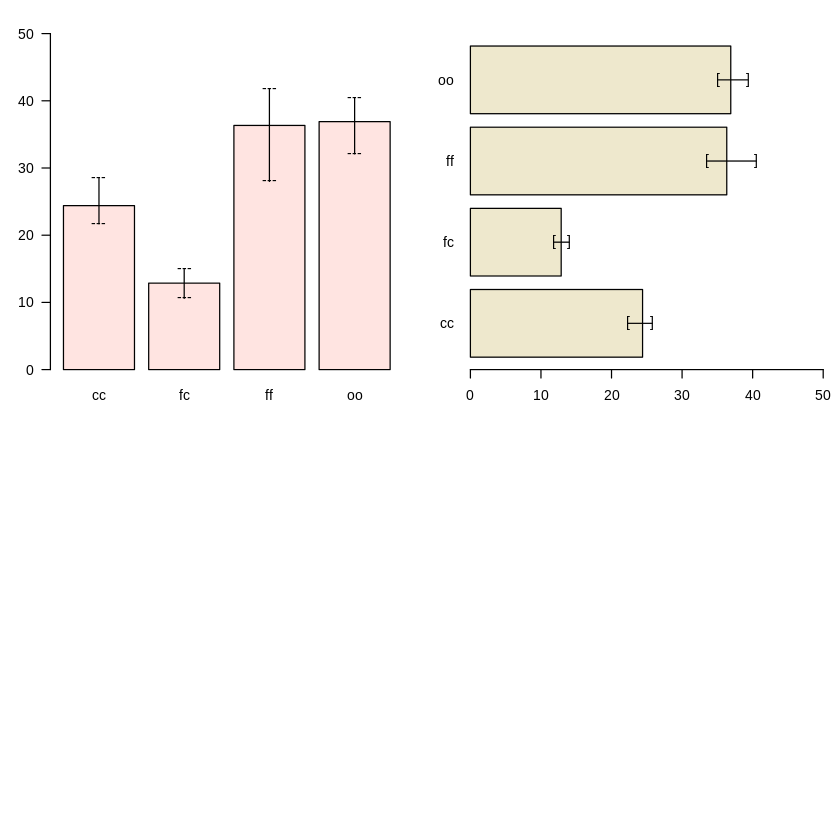

In [67]:
str(bar.err)
oldpar = par(mfrow = c(2, 2), mar = c(3, 3, 2, 1), cex = 0.7)
c1 = colors()[480]
c2 = colors()[65]
bar.err(outHSD$means, variation = "range", ylim = c(0, 50), col = c1, las = 1)
bar.err(outHSD$means, variation = "IQR", horiz = TRUE, xlim = c(0, 50), col = c2, las = 1)

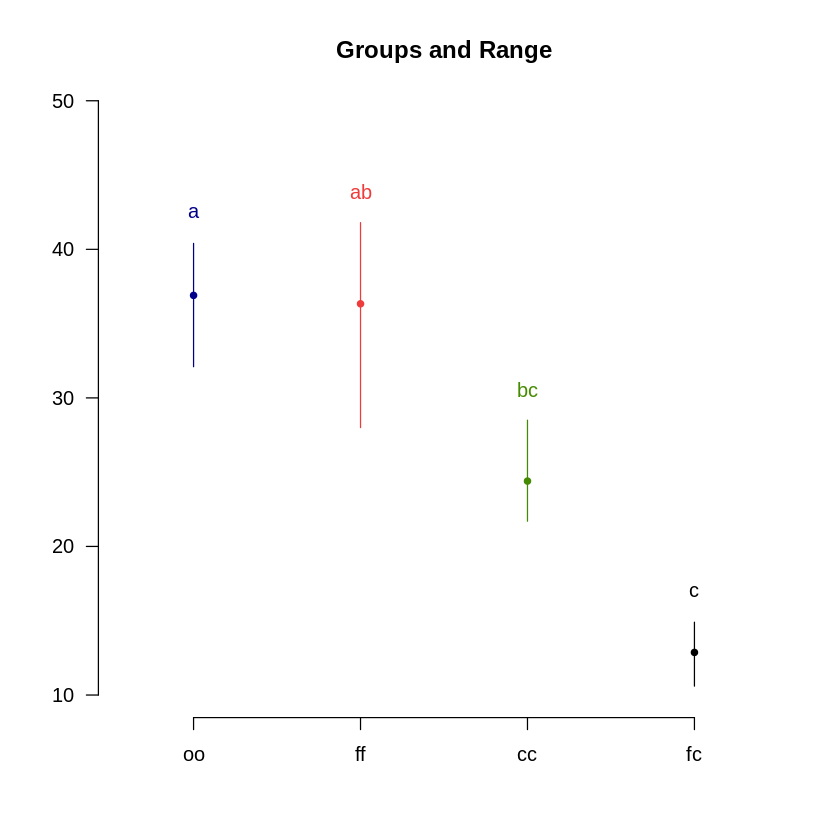

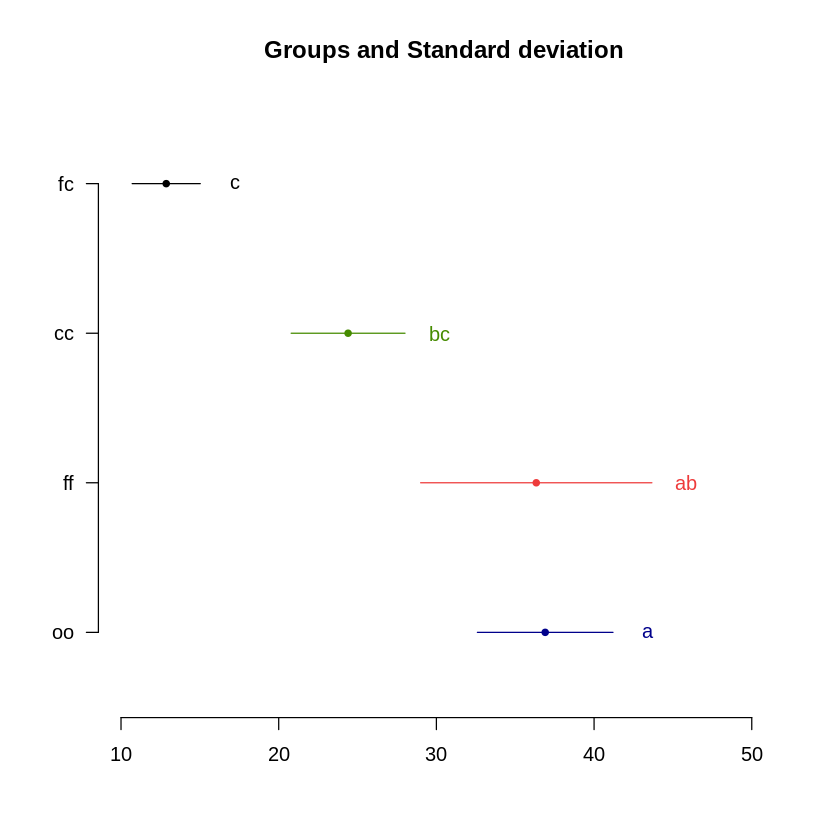

In [68]:
plot(outHSD, variation = "range", las = 1)
plot(outHSD, horiz = TRUE, variation = "SD", las = 1)

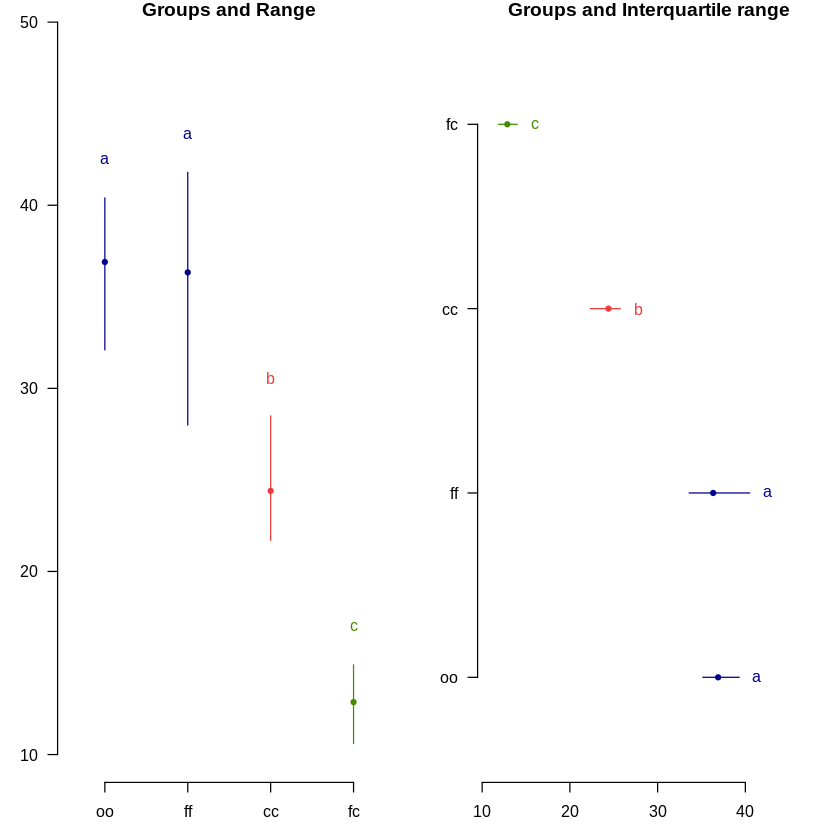

In [69]:
par(oldpar)
oldpar = par(mfrow = c(1, 2), mar = c(3, 3, 1, 1), cex = 0.8)
x = duncan.test(model, "virus", group = TRUE)
plot(x, las = 1)
plot(x, variation = "IQR", horiz = TRUE, las = 1)
par(oldpar)

In [70]:
# b + 기타그래픽 : modelPBIB missing --> ERROR
# oldpar = par(mfrow = c(2, 2), cex = 0.7, mar = c(3.5, 1.5, 3, 1))
# C1 = bar.err(modelPBIB$means[1:7, ], ylim = c(0, 9), col = 0, main = "C1", variation = "range", border = 3, las = 2)
# C2 = bar.err(modelPBIB$means[8:15, ], ylim = c(0, 9), col = 0, main = "C2", variation = "range", border = 4, las = 2)
# C3 = bar.err(modelPBIB$means[16:22, ], ylim = c(0, 9), col = 0, main = "C3", variation = "range", border = 2, las = 2)
# C4 = bar.err(modelPBIB$means[23:30, ], ylim = c(0, 9), col = 0, main = "C4", variation = "range", border = 6, las = 2)

In [71]:
# b + Lattice 그래픽 : modelLatticee missing --> ERROR
# par(oldpar)
# oldpar = par(mar = c(2.5, 2.5, 1, 0), cex = 0.6)
# bar.group(modelLattice$group, ylim = c(0, 55), density = 10, las = 1)
# par(oldpar)

### (c) plot.group()

function (x, variation = c("range", "IQR", "SE", "SD"), decreasing = TRUE, 
    horiz = FALSE, col = NULL, xlim = NULL, ylim = NULL, main = NULL, cex = NULL, 
    hy = 0, ...)  


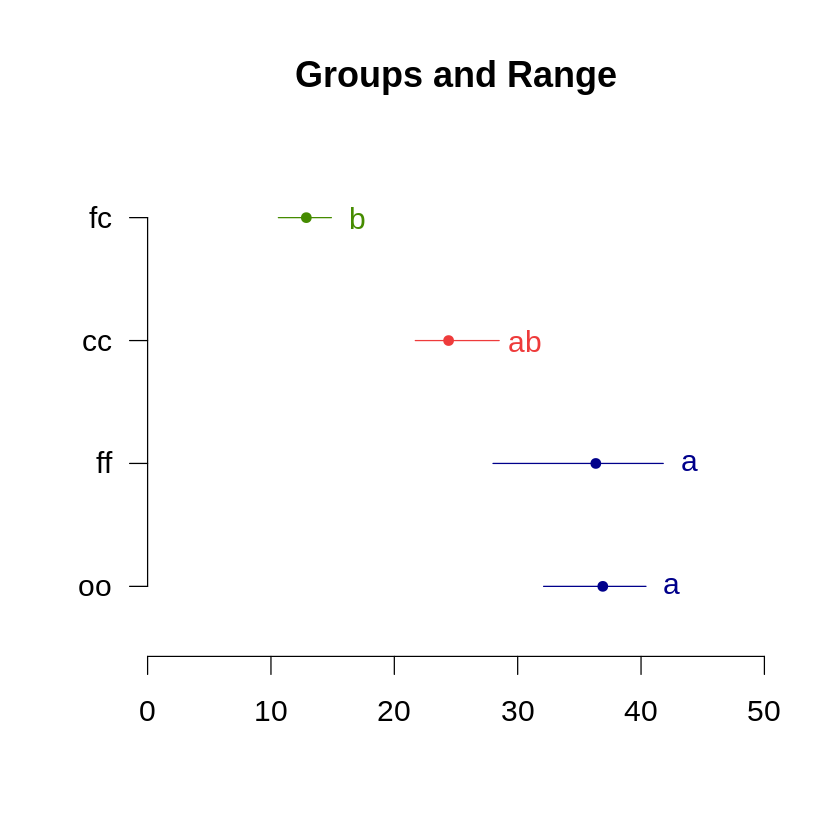

In [72]:
str(plot.group)
data("sweetpotato")
model = aov(yield ~ virus, data = sweetpotato)
comparison = LSD.test(model, "virus", alpha = 0.01, group = TRUE)
op = par(cex = 1.5)
plot(comparison, horiz = TRUE, xlim = c(0, 50), las = 1)

### (d) diffograph()

function (x, main = NULL, color1 = "red", color2 = "blue", color3 = "black", 
    cex.axis = 0.8, las = 1, pch = 20, bty = "l", cex = 0.8, lwd = 1, xlab = "", 
    ylab = "", ...)  


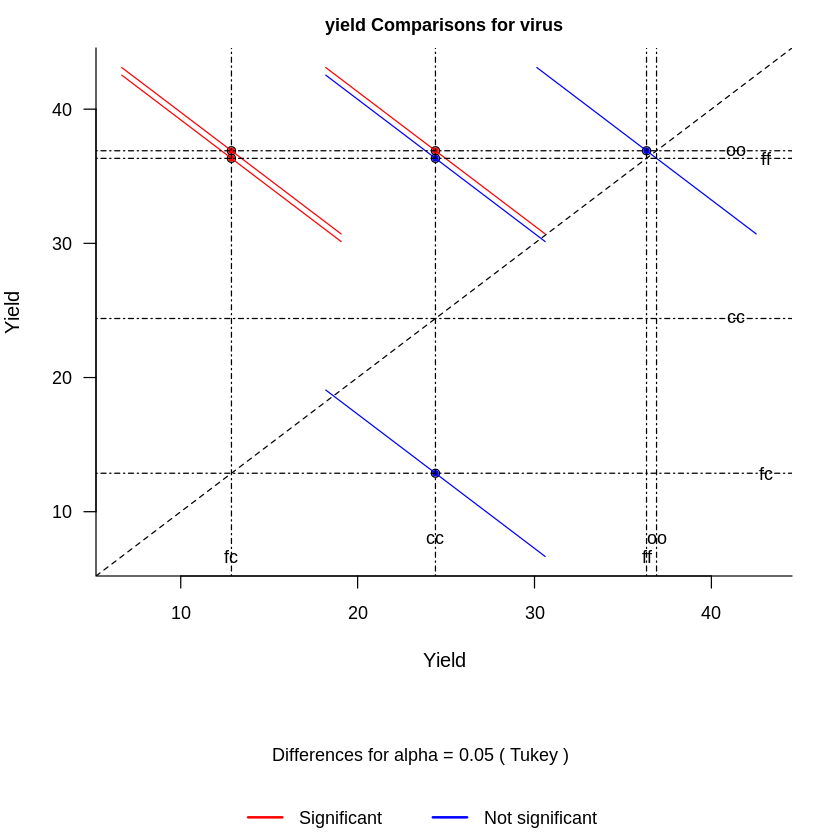

In [73]:
str(diffograph)
x = HSD.test(model, "virus", group = FALSE)
diffograph(x, cex.axis = 0.9, xlab = "Yield", ylab = "Yield", cex = 0.9)

## 5.2.3 기타 모형별 다중비교

In [74]:
yield = scan(text = "6 7 9 13 16 20 8 8 9 7 8 8 12 17 18 10 9 12 9 9 9 14 18 21 11 12 11 8 10 10 15 16 22 9 9 9")
block = gl(4, 9)
clone = rep(gl(3, 3, labels = c("c1", "c2", "c3")), 4)
nitrogen = rep(gl(3, 1, labels = c("n1", "n2", "n3")), 12)
A = data.frame(block, clone, nitrogen, yield)
str(A)
head(A)

'data.frame':	36 obs. of  4 variables:
 $ block   : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 2 ...
 $ clone   : Factor w/ 3 levels "c1","c2","c3": 1 1 1 2 2 2 3 3 3 1 ...
 $ nitrogen: Factor w/ 3 levels "n1","n2","n3": 1 2 3 1 2 3 1 2 3 1 ...
 $ yield   : num  6 7 9 13 16 20 8 8 9 7 ...


,block,clone,nitrogen,yield
,<fct>,<fct>,<fct>,<dbl>
1,1,c1,n1,6
2,1,c1,n2,7
3,1,c1,n3,9
4,1,c2,n1,13
5,1,c2,n2,16
6,1,c2,n3,20


In [75]:
outAOV = aov(yield ~ block + clone * nitrogen, data = A)
anova(outAOV)
outFactorial = LSD.test(outAOV, c("clone", "nitrogen"),
                        main = "Yield ~ block + nitrogen + clone + clone:nitrogen", console = TRUE)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
block,3,20.75000,6.916667,5.824561,3.874630e-03
clone,2,497.72222,248.861111,209.567251,6.369541e-16
nitrogen,2,54.05556,27.027778,22.760234,2.865383e-06
clone:nitrogen,4,43.27778,10.819444,9.111111,1.264554e-04
Residuals,24,28.50000,1.187500,NA,NA



Study: Yield ~ block + nitrogen + clone + clone:nitrogen

LSD t Test for yield 

Mean Square Error:  1.1875 

clone:nitrogen,  means and individual ( 95 %) CI

      yield       std r        se       LCL       UCL Min Max   Q25  Q50   Q75
c1:n1  7.50 1.2909944 4 0.5448624  6.375459  8.624541   6   9  6.75  7.5  8.25
c1:n2  8.50 1.2909944 4 0.5448624  7.375459  9.624541   7  10  7.75  8.5  9.25
c1:n3  9.00 0.8164966 4 0.5448624  7.875459 10.124541   8  10  8.75  9.0  9.25
c2:n1 13.50 1.2909944 4 0.5448624 12.375459 14.624541  12  15 12.75 13.5 14.25
c2:n2 16.75 0.9574271 4 0.5448624 15.625459 17.874541  16  18 16.00 16.5 17.25
c2:n3 20.25 1.7078251 4 0.5448624 19.125459 21.374541  18  22 19.50 20.5 21.25
c3:n1  9.50 1.2909944 4 0.5448624  8.375459 10.624541   8  11  8.75  9.5 10.25
c3:n2  9.50 1.7320508 4 0.5448624  8.375459 10.624541   8  12  8.75  9.0  9.75
c3:n3 10.25 1.5000000 4 0.5448624  9.125459 11.374541   9  12  9.00 10.0 11.25

Alpha: 0.05 ; DF Error: 24
Critical Value of t: 

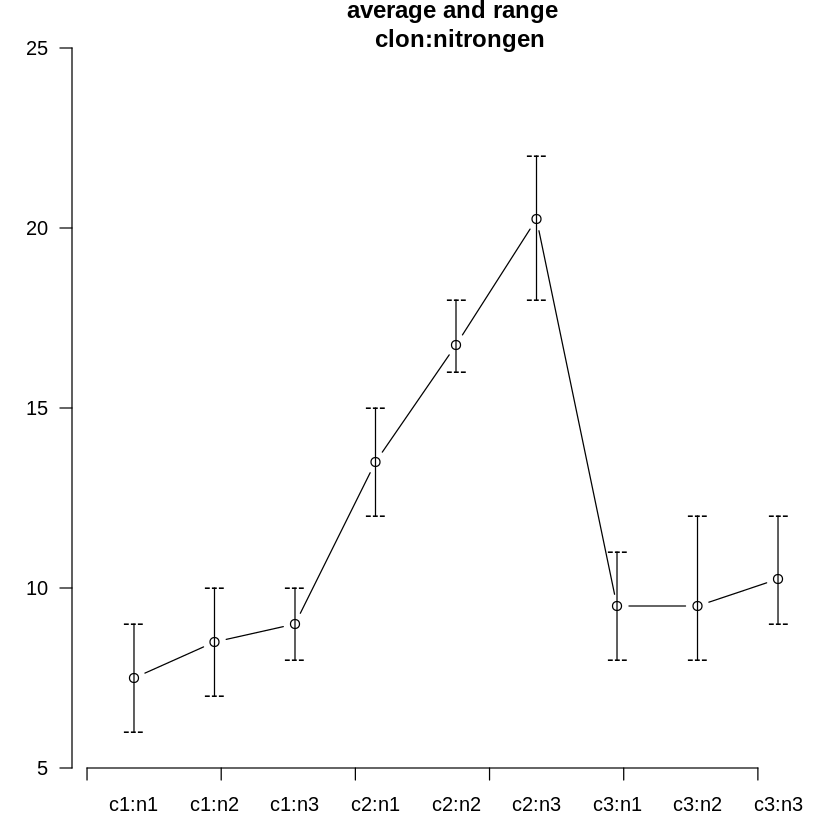

In [76]:
oldpar = par(mar = c(3, 3, 2, 0))
pic1 = bar.err(outFactorial$means, variation = "range", ylim = c(5, 25), bar = FALSE, col = 0, las = 1)
points(pic1$index, pic1$means, pch = 18, cex = 1.5, col = "blue")
axis(1, pic1$index, labels = FALSE)
title(main = "average and range \n clon:nitrongen")
par(oldpar)

### 예제 5.16 : 균형불완비블록설계

In [77]:
block = gl(10, 3)
variety = c(1, 2, 3, 1, 2, 4, 1, 3, 5, 1, 4, 6, 1, 5, 6, 2, 3, 6, 2, 4, 5, 2, 5, 6, 3, 4, 5, 3, 4, 6)
Y = c(69, 54, 50, 77, 65, 38, 72, 45, 54, 63, 60, 39, 70, 65, 54, 65, 68, 67, 57, 60, 62, 59, 65, 63, 75, 62, 61, 59, 55, 56)
head(cbind(block, variety, Y))
str(BIB.test)

block,variety,Y
1,1,69
1,2,54
1,3,50
2,1,77
2,2,65
2,4,38


function (block, trt, y, test = c("lsd", "tukey", "duncan", "waller", "snk"), 
    alpha = 0.05, group = TRUE, console = FALSE)  


In [78]:
BIB.test(block, variety, Y, console = TRUE)
out = BIB.test(block, trt = variety, Y, test = "tukey", group = FALSE, console = TRUE)
names(out)
rm(block, variety)


ANALYSIS BIB:  Y 
Class level information

Block:  1 2 3 4 5 6 7 8 9 10
Trt  :  1 2 3 4 5 6

Number of observations:  30 

Analysis of Variance Table

Response: Y
            Df  Sum Sq Mean Sq F value  Pr(>F)  
block.unadj  9  466.97  51.885  0.9019 0.54712  
trt.adj      5 1156.44 231.289  4.0206 0.01629 *
Residuals   15  862.89  57.526                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

coefficient of variation: 12.6 %
Y Means: 60.3 

variety,  statistics

     Y mean.adj       SE r       std Min Max
1 70.2 75.13333 3.728552 5  5.069517  63  77
2 60.0 58.71667 3.728552 5  4.898979  54  65
3 59.4 58.55000 3.728552 5 12.381438  45  75
4 55.0 54.96667 3.728552 5  9.848858  38  62
5 61.4 60.05000 3.728552 5  4.505552  54  65
6 55.8 54.38333 3.728552 5 10.756393  39  67

LSD test
Std.diff   : 5.363111
Alpha      : 0.05
LSD        : 11.4312
Parameters BIB
Lambda     : 2
treatmeans : 6
Block size : 3
Blocks     : 10
Replication: 5 

Efficiency factor 0.8 

[1] "parameters" "statistics" "comparison" "means"      "groups"